In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [22]:
df = pd.read_csv("Data/diabetes_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [23]:
#Tabajamos las columnas categóricas para pasarlas a numéricas 

le = LabelEncoder()
df_encoder = df

columnas_categoricas = ["gender", "ethnicity", "education_level" ,"income_level", 
                        "employment_status", "smoking_status", "diabetes_stage"]

for col in columnas_categoricas:
    df_encoder[col] = le.fit_transform(df[col])

df_encoder.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,1,0,1,2,0,2,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,4,1
1,48,0,4,1,3,0,1,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,1,0
2,60,1,2,1,3,3,2,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,4,1
3,74,0,1,1,1,1,2,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,4,1
4,46,1,4,0,3,1,2,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,4,1


In [24]:
X = df_encoder.drop("diagnosed_diabetes", axis=1)
y = df_encoder["diagnosed_diabetes"]

In [25]:
#Como trabajamos con un dataset muy grande, usamos train test y no k folds debido a los costos computacionales

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [40]:
rf = RandomForestClassifier(n_estimators= 100,
    max_features= 'sqrt',
    max_depth= 6,
    criterion='gini',
    random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12067
           1       1.00      1.00      1.00     17933

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



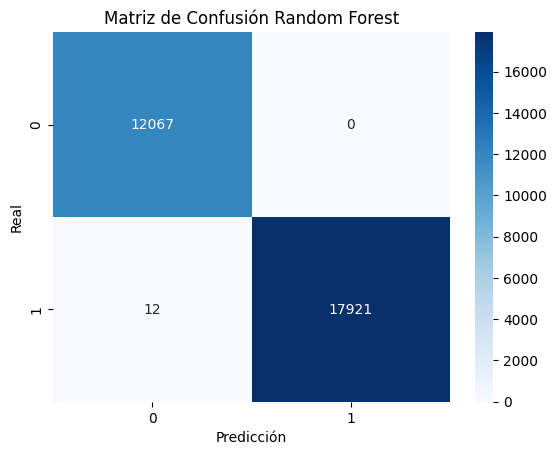

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Random Forest')
plt.show()

In [32]:
#Probamos Rendimiento de XGBoost
import xgboost as xgb

In [43]:
# Modelo de clasificación
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,     
    max_depth=5,          
    learning_rate=0.1,   
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42
)


xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
y_pred2 = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12067
           1       1.00      1.00      1.00     17933

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



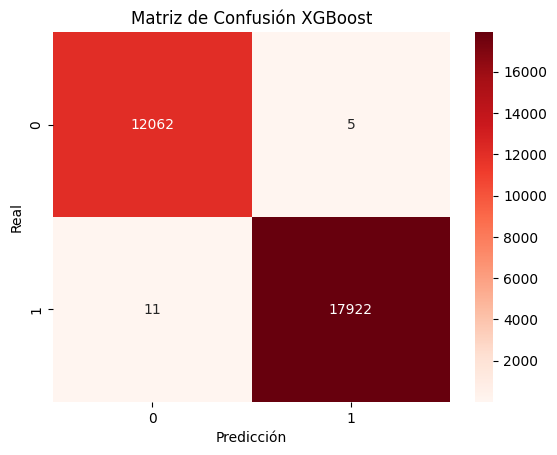

In [38]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión XGBoost')
plt.show()